In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

In [ ]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [ ]:
# import data_analysis_function
a=None

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [1]:
import json
#import collections
import os
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

from dataset_analysis import create_dataframe, create_dateTime, create_month
from dataset_analysis import specific_month_df, drop_month_year, alter_time, rearrange_frame
from dataset_analysis import check_A_B_blast_furnace_1, no_zero_value_in_target_1, dataframe_reset_index
from dataset_analysis import drop_nan_value, drop_unique_valued_columns, drop_string_column, dataframe_datetime

from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
# from dataset_analysis import dataframe_date_time_type
from dataset_analysis import draw_graph
# from dataset_analysis import draw_feature_vs_target

In [3]:
from model_file import make_dataset, scikit_learn_model
from model_file import plot_graph, evaluation_metrices
from model_file import NN_model
from model_file import make_dataset_LSTM, split_sequence, LSTM_model

In [135]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
feb_march_file = config['DEFAULT']['feb_march_file']

filepath_server_feb_march = config['DEFAULT']['file_path_server_feb_march']
filepath_server_april_may = config['DEFAULT']['file_path_server_april_may']
filepath_server_june_july = config['DEFAULT']['file_path_server_june_july']


start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
required_number_of_test_data = config['DEFAULT']['required_number_of_test_data']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
number_of_step_lstm = config['DEFAULT']['n_steps_lstm']
epochs = config['DEFAULT']['epochs']
batch_size = config['DEFAULT']['batch_size']


print(epochs)

30


In [5]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(' has already created',final_directory)
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
 has already created /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder


In [6]:
# # import pandas as pd
# # count = 0
# # for data in pd.read_csv(filepath_server,encoding = 'ISO-8859-1',chunksize  = 1000):
# #     count += 1                          # counting the number of chunks
# #     lastlen = len(data)                 # finding the length of last chunk
# # datalength = (count*1000 + lastlen - 1000) # length of total file

# import multiprocessing as mp
# print("Number of processors: ", mp.cpu_count())

In [7]:
initial_dataframe = create_dataframe(filepath_server_feb_march)

In [8]:
print(initial_dataframe.shape)

(45128, 4240)


In [9]:
initial_dataframe.head(2)

,Unnamed: 0,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,140972,1554076740000,68.800616,38.813747,92.134679,31.640239,55.709343,89.382264,93.755293,25.978776,...,0,83.568835,41.687065,37.582423,79.148815,75.633611,68.747738,66.438534,0.678688,12.421052
1,140973,1554076680000,71.799463,46.388546,91.813585,30.635985,55.709343,89.382264,93.714470,28.573610,...,0,83.620740,41.687065,37.524301,79.092552,75.611684,68.382080,66.390368,0.679430,11.903316


In [ ]:
# temp_frame = initial_dataframe.iloc[-45128:,:]
# temp_frame = initial_dataframe.iloc[-85349:-45128,:]
# temp_frame = initial_dataframe.iloc[-165519:-85349,:]

In [ ]:
# temp_frame.to_csv('june_july_1.csv')

In [ ]:
# read = create_dataframe('june_july_1.csv')

In [ ]:
# read.columns.get_loc('Unnamed: 0')

In [ ]:
# read_1 = read.drop(read.columns[0], axis=1)

In [ ]:
# read_1.tail(2)

In [10]:
df_1 = create_dateTime(initial_dataframe,'row_ID','Unnamed: 0')
# df_1 = create_dateTime(read_1)

In [ ]:
# def distinct_month_1(dataframe, target_column,month_key):
#     array_df = []
#     for i in month_key:
#         req_data_1=dataframe.loc[(dataframe[target_column]==i)]
#         req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
#         array_df.append(req_frame_1)
    
#     return array_df

In [ ]:
# def draw_month(month_key_value, dict_of_month,target_column):
#     for i in month_key_value:
#         value = dict_of_month[i]
#         value.iloc[:].plot(y=[target_column])
#         plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
#         plt.xlabel('range')
#         plt.ylabel('value')

#         plt.rcParams['figure.figsize'] = (5,5)
#         plt.savefig(str(i) + '.jpg')
#         plt.show()

In [11]:
date_df, month_array_df = create_month(df_1, 'month', target_column)

In [ ]:
# # for i in specific_month_df['month']:
# #     print(i)

# initial_dataframe = None
# df_1 = None
# date_df = None
# specific_month_df = None
# spec_month = None
# multivariate_data = None
# rearranged_dataframe = None
# dataframe_x = None
# dataframe_y = None
# dataframe_no_zero_value_blast_furnace = None

In [12]:
# import pandas as pd
# def specific_month_df(dataframe,target_column_month):
#     req_data_month=dataframe.loc[(dataframe[target_column_month]==2) | (dataframe[target_column_month]==3) |
#                                  (dataframe[target_column_month]==4)
#                                  | (dataframe[target_column_month]==5) | (dataframe[target_column_month]==6) | (dataframe[target_column_month]==7)
#                                  | (dataframe[target_column_month]==8)]
# #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
#     req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
#     return req_frame_month

specific_month_df = specific_month_df(date_df,'month')

In [13]:
# def drop_month_year(dataframe):
# #     dataframe = dataframe.drop(['year','month'], axis=1)
#     dataframe = dataframe.reset_index()
#     return dataframe

# spec_month = drop_month_year(date_df)
spec_month = drop_month_year(specific_month_df)

In [ ]:
# spec_month = spec_month.iloc[:200,:]

In [ ]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [ ]:
# targ = pd.DataFrame(target_df)

In [ ]:
# df_month = pd.DataFrame(index=df_2.index)

In [ ]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [ ]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [ ]:
# df_month

In [ ]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [ ]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(45128, 4240)


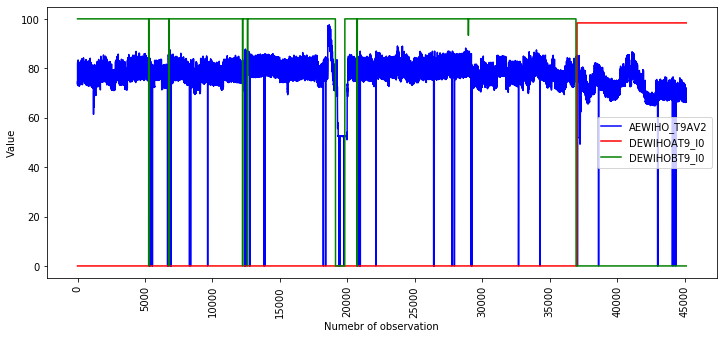

In [15]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'green')
plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# plt.xlim(0,initial_dataframe.shape[0]+10)
plt.xticks(np.arange(0,initial_dataframe.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('blast_vs_target_pre.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12,5)

In [16]:
multivariate_data = alter_time(spec_month, start_pos,spec_month.shape[0])

In [17]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [18]:
dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [ ]:
# dataframe_x = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_y = dataframe_x.drop(['index'], axis=1)

In [ ]:
# print(dataframe_y.shape)
# plt.plot(dataframe_y[target_column], color = 'blue')
# plt.plot(dataframe_y[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_y[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,dataframe_y.shape[0],5000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# plt.savefig('blast_vs_target_vanish_furnace_zero.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12,5)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [19]:
dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

# dataframe_no_zero_value_target_column = None

In [20]:
dataframe_no_zero_value_target_column_2 = dataframe_reset_index(dataframe_no_zero_value_target_column)
print(dataframe_no_zero_value_target_column_2.shape)

(43982, 4241)


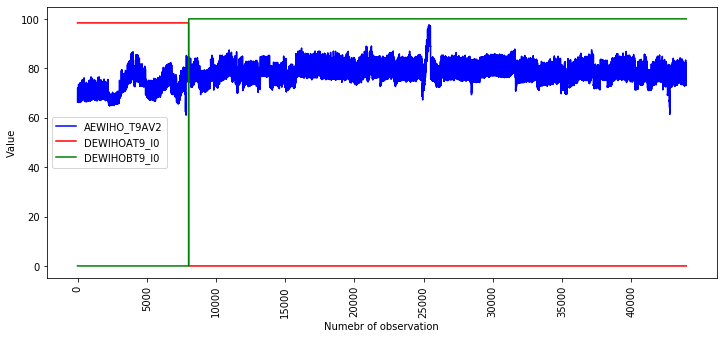

In [21]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='center left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
plt.xticks(np.arange(0,dataframe_no_zero_value_target_column_2.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('blast_vs_target_post.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [22]:
# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [ ]:
# nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
# cols_to_drop = nunique[nunique == 1].index
# dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [23]:
dataframe_drop_column_with_same_value = drop_unique_valued_columns(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [ ]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [24]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [25]:
dataframe_no_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2923, dtype: object

In [26]:
initial_dataframe = None
date_df = None
specific_month_df = None
spec_month = None
rearranged_dataframe = None
multivariate_data = None
dataframe_no_zero_value_blast_furnace = None
dataframe_no_zero_value_target_column = None
multivariate_data_drop_nan = None
dataframe_drop_column_with_same_value = None

In [ ]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

(43982, 2923)


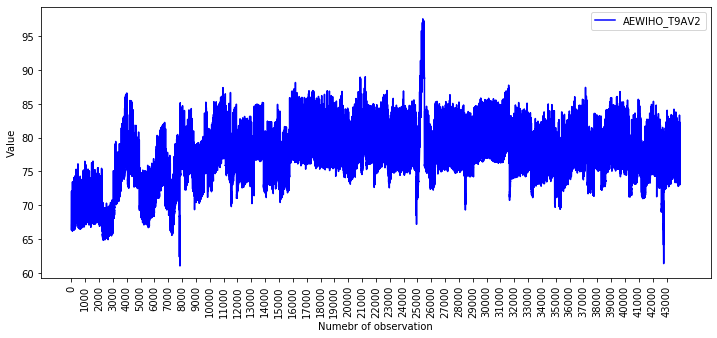

In [27]:
print(dataframe_no_string.shape)

plt.plot(dataframe_no_string[target_column], color = 'blue')
# plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_no_string.shape[0],1000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [28]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_datetime(dataframe_no_string)

In [29]:
dataframe_datetime.shape

(43982, 2922)

In [30]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [31]:
# feature selection with Pearson Correlation.
sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [ ]:
# correlation_csv = main_correlation.to_csv('high_correlation_feb_march_april_may.csv')

In [ ]:
# dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')

In [103]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [104]:
print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(43982, 4)


,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHO_T9AV2
count,43982.000000,43982.000000,43982.000000,43982.000000
mean,64.260755,82.044461,77.888892,75.408309
std,30.286731,8.561464,5.660269,4.142153
min,0.000000,9.853600,37.072978,61.020431
25%,74.612018,78.339536,75.197192,73.414111
50%,77.344752,84.047312,78.973621,75.582311
75%,78.843572,88.140525,81.832457,77.020827
max,100.000000,100.000000,91.486047,97.591043


In [105]:
dataframe_high_correlation.head(2)

,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHO_T9AV2
dateTime,,,,
2019-02-11 20:57:00,3.165909e-19,64.401098,63.413868,66.387058
2019-02-11 20:58:00,3.165909e-19,63.977060,63.408894,66.765225


In [106]:
dataframe_resample = dataframe_high_correlation.resample('1min').mean()
dataframe_resample_copy = dataframe_resample.copy()
dataframe_resample_copy = dataframe_resample_copy.reset_index()

In [107]:
dataframe_resample.head(2)

,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHO_T9AV2
dateTime,,,,
2019-02-11 20:57:00,3.165909e-19,64.401098,63.413868,66.387058
2019-02-11 20:58:00,3.165909e-19,63.977060,63.408894,66.765225


(69303, 5)


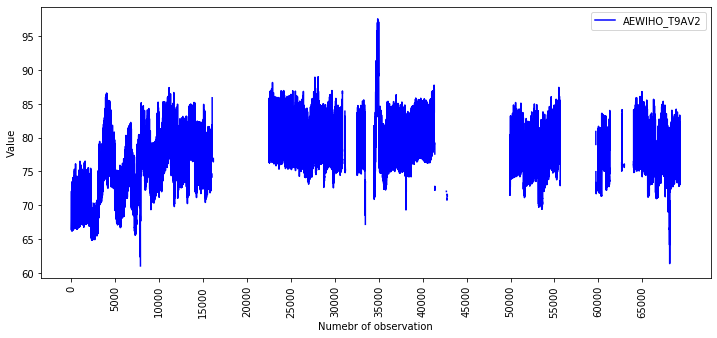

In [108]:
print(dataframe_resample_copy.shape)

plt.plot(dataframe_resample_copy[target_column], color = 'blue')
plt.legend([target_column], loc='best')
# plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# plt.xticks(rotation = 'vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.xlim(dataframe_resample_copy.index[0],dataframe_resample_copy.index[-1])
plt.xticks(np.arange(0,dataframe_resample_copy.shape[0],5000),rotation='vertical')
# plt.savefig('resample.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12, 5)

In [109]:
dataframe_interpolate = dataframe_resample.interpolate('linear')
dataframe_interpolate_copy = dataframe_interpolate.copy()
dataframe_interpolate_copy = dataframe_interpolate_copy.reset_index()

(69303, 5)


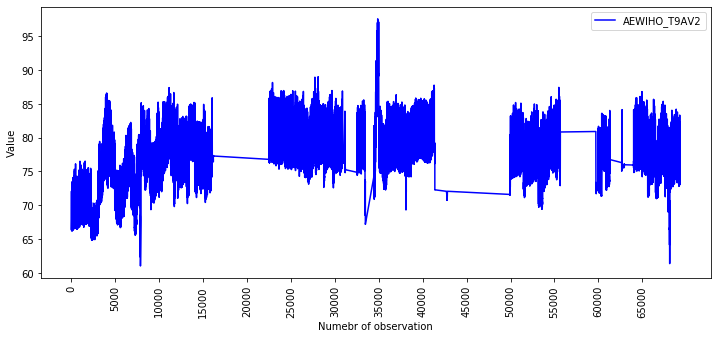

In [110]:
print(dataframe_interpolate_copy.shape)
plt.plot(dataframe_interpolate_copy[target_column], color = 'blue')
plt.legend([target_column], loc='best')
# plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# plt.xticks(rotation = 'vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.xlim(dataframe_interpolate.index[0],dataframe_interpolate.index[-1]+5)
plt.xticks(np.arange(0,dataframe_interpolate_copy.shape[0],5000),rotation = 'vertical')
# plt.savefig('interpolation.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12, 5)

# make test dataset from another file

In [237]:
def make_testing_set_from_another_file(datafile_path,target_column,date_column, furnace_signal_column_a,furnace_signal_column_b,value_A,value_B,
                                      req_drop_value_target, max_best_number, correlation_threshold_min_value, correlation_threshold_max_value, start_pos):
    dataframe = create_dataframe(datafile_path)
    
    print('loaded dataframe shape: ',dataframe.shape)
    dataframe = create_dateTime(dataframe,'row_ID','Unnamed: 0')
    dataframe, month_array = create_month(dataframe, 'month', target_column)
    print('here ', dataframe.shape)
    dataframe.dtypes
    
    def specific_month_df(dataframe, target_column_month):
        req_data_month = dataframe.loc[(dataframe[target_column_month] == 4) | (dataframe[target_column_month] == 5)]
    #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
        req_frame_month = pd.DataFrame(req_data_month, columns=dataframe.columns)

        return req_frame_month
    dataframe = specific_month_df(dataframe,'month')
    
    print('here_1 ', dataframe.shape)
    dataframe.dtypes
    
    dataframe = drop_month_year(dataframe)
    dataframe = alter_time(dataframe, start_pos,dataframe.shape[0])
    
    print('here_2 ', dataframe.shape)
    dataframe.dtypes
    
    index_array=[0,-1]
    req_column_name = [date_column, target_column]
#     req_column_name = [date_column, furnace_signal_column]
    dataframe = rearrange_frame(dataframe,req_column_name,index_array)
    
    dataframe = check_A_B_blast_furnace_1(dataframe, furnace_signal_column_a, value_A,furnace_signal_column_b, value_B)
    dataframe = no_zero_value_in_target_1(dataframe,target_column, req_drop_value_target)
    dataframe = dataframe_reset_index(dataframe)
    dataframe = drop_nan_value(dataframe)
    dataframe = drop_unique_valued_columns(dataframe)
    dataframe = drop_string_column(dataframe)
    dataframe = dataframe.set_index('dateTime')
#     dataframe = dataframe_datetime(dataframe)
    
    sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe,max_best_number)
    sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe)
    
    main_frame = dataframe
    correlated_frame = main_correlation
    
    dataframe = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)
    dataframe = dataframe.resample('1min').mean()
    dataframe = dataframe.interpolate('linear')
    
    return dataframe
    
dataframe_for_testing = make_testing_set_from_another_file(filepath_server_april_may,target_column,date_column,furnace_signal_column_a, 
                                                           furnace_signal_column_b,value_A, value_B, req_drop_value_target, max_best_number, 
                                                           correlation_threshold_min_value, correlation_threshold_max_value, start_pos)



    

loaded dataframe shape:  (40221, 4240)
here  (40221, 4240)
here_1  (40221, 4240)
here_2  (40221, 4241)


In [243]:
dataframe_for_testing_array = np.array(dataframe_for_testing)
new_test_input = dataframe_for_testing_array[:500,:-1]
new_test_output = dataframe_for_testing_array[:500,-1]
new_test_output = np.reshape(new_test_output,(-1,1))

print(new_test_input.shape)
print(new_test_output.shape)

(500, 6)
(500, 1)


In [ ]:
# dataframe_interpolate_poly = dataframe_resample.interpolate('time')

In [ ]:
# print(dataframe_interpolate_poly.shape)
# plt.plot(dataframe_interpolate_poly[target_column], color = 'blue')
# plt.legend([target_column], loc='best')
# # plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# # plt.xticks(rotation = 'vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.xlim(dataframe_interpolate.index[0],dataframe_interpolate.index[-1]+5)
# # plt.xticks(np.arange(0,dataframe_interpolate_poly.shape[0],5000),rotation = 'vertical')
# # plt.savefig('interpolation.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [ ]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [ ]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [ ]:
# current_directory = os.getcwd()
# print('current_directory is: ',current_directory)
# address = 'image_folder'
# final_directory = current_directory+'/'+str(address)
# if not os.path.exists(final_directory):
#     os.makedirs(final_directory)
#     print('created : ', final_directory)
# else:
#     print(' has already created',final_directory)
#     pass

In [74]:
from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2019-10-11


In [40]:
dataframe_high_correlation.shape

(43982, 4)

In [ ]:
from dataset_analysis import draw_feature_vs_target
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'+'_'+str(today)
draw_feature_vs_target = draw_feature_vs_target(dataframe_interpolate,final_directory,subfolder_1)

In [46]:
def make_dataset(dataframe, required_number_of_test_data):
    dataset = np.array(dataframe)
    
    go_for_training = int(len(dataset)-required_number_of_test_data)
    print('go_for_training: ', go_for_training)
    print('required_number_of_test_data: ', required_number_of_test_data)
    percentage = go_for_training/int(len(dataset))
    print('percentage: ',percentage)
    
    NumberOfElements = int(len(dataset) * percentage)
    print('Number of Elements for training: ', NumberOfElements)
    print('dataset length: ', len(dataset))

    train_input = dataset[0:NumberOfElements, 0:-1]
    print('train_input shape: ', train_input.shape)
    train_output = dataset[0:NumberOfElements, -1]
    print('train_output shape: ', train_output.shape)

    test_input = dataset[NumberOfElements:len(dataset), 0:-1]
    test_output = dataset[NumberOfElements:len(dataset), -1]
    

#     test_input = test_input[500:560]
#     test_output = test_output[500:560]
    print('test_input shape: ', test_input.shape)
    print('test_output shape: ', test_output.shape)

    return train_input, train_output, test_input, test_output

In [75]:
dataframe_interpolate.head(2)

,DEDATK_206I0,RWDAHOBG9_V0,AEDAHO_T9_V2,RWDATZ_HO_V1,AEDAKWM1OFF0,AEDAKWM2OFF0,AEDAKWM3OFF0,AEDAKW80SWP0,AEDAKWK1SWP0,AEDAKWK2SWP0,...,AEELGLBASWL3,AEBWTSB__AV0,DEWIHOBT9_I0,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHOBKF_V0,RWWIHOBT9_V0,RWWIHOUT9_V1,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-02-11 20:57:00,0.0,1.291106e-15,53.060006,35.085015,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.776329,0.0,3.165909e-19,64.401098,63.413868,0.0,0.0,0.0,66.387058
2019-02-11 20:58:00,0.0,1.291106e-15,54.769975,35.664017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,47.478277,0.0,3.165909e-19,63.977060,63.408894,0.0,0.0,0.0,66.765225


In [111]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_interpolate,required_number_of_test_data)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(fit_intercept=True),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

go_for_training:  69103
required_number_of_test_data:  200
percentage:  0.9971141220437788
Number of Elements for training:  69103
dataset length:  69303
train_input shape:  (69103, 3)
train_output shape:  (69103,)
test_input shape:  (200, 3)
test_output shape:  (200,)


In [112]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file removed and created


In [ ]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

In [ ]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

In [51]:
train_ip_reg = train_input[0:500,:]
train_op_reg = train_output[0:500]

test_ip_reg = test_input[0:10,:]
test_op_reg = test_output[0:10]

print(train_ip_reg.shape)
print(train_op_reg.shape)

print('#'*10)

print(test_ip_reg.shape)
print(test_op_reg.shape)

(500, 3)
(500,)
##########
(10, 3)
(10,)


In [44]:
from sklearn import *

In [94]:
my_model = ExtraTreesRegressor()
# my_model = sklearn.linear_model.LinearRegression(fit_intercept=True)
# my_model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
my_model.fit(train_input, train_output)
# my_model.fit(train_ip_reg, train_op_reg)

/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [244]:
my_pred = my_model.predict(new_test_input)

ValueError: Number of features of the model must match the input. Model n_features is 23 and input n_features is 6 

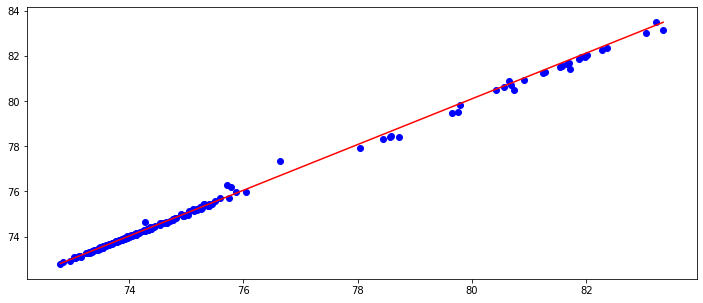

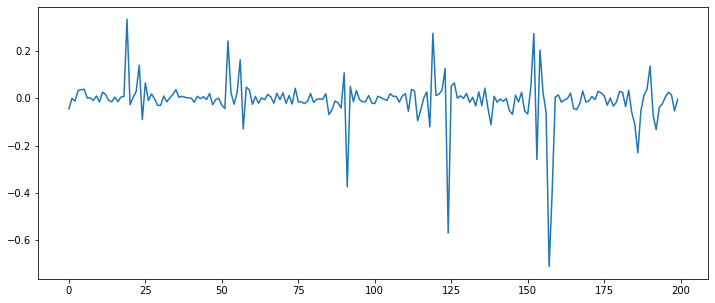

In [96]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

plt.figure()

difference = test_output-my_pred
plt.plot(difference)

# plt.plot((min(test_op_reg), max(test_op_reg)), (min(my_pred), max(my_pred)), color='red')
# plt.scatter(test_op_reg, my_pred, color='blue')

In [97]:
test_op_reg = test_output
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_op_reg,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_op_reg,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_op_reg,my_pred))
RMSE=math.sqrt(mean_squared_error(test_op_reg,my_pred))
print('RMSE: ',RMSE)

r_2 statistic: 1.00
Mean_absolute_error: 0.05
Mean squared error: 0.01
RMSE:  0.098003143399497


In [68]:
import graphviz 
dot_data = tree.export_graphviz(my_model, out_file='mytree_1.dot',feature_names =['f1','f2','f3'])

In [ ]:
from sklearn import tree  
import pydotplus

try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

dotfile = StringIO()
tree.export_graphviz(my_model, out_file=dot_data.dot)
# graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
(graph,)=pydot.graph_from_dot_data(dotfile.getvalue())

graph.write_png("dtree.png")

In [ ]:
tree.export_graphviz(my_model, out_file='newtree.dot') #produces dot file

import pydot
dotfile = StringIO()
tree.export_graphviz(my_model, out_file=dotfile)
pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(my_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# scikit learn Learning Curve

In [210]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(my_model,train_input,train_output, cv=10
                                                              ,scoring = 'neg_mean_squared_error',n_jobs=4)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


import pandas as pd
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

print('train_size: ', train_sizes)

Training scores:

 [[-1.04787942e-09 -1.47581849e-06 -1.47388436e-06 -1.47234039e-06
  -1.47232673e-06 -1.47232635e-06 -1.47233755e-06 -1.47234369e-06
  -1.47233179e-06 -1.55630136e-06]
 [-1.92522028e-09 -3.24518140e-06 -3.21824891e-06 -3.21877352e-06
  -3.21913072e-06 -3.21877152e-06 -3.21893607e-06 -3.21881031e-06
  -3.21889054e-06 -3.21877380e-06]
 [-1.65942442e-09 -1.90297380e-06 -1.90206533e-06 -1.90240721e-06
  -1.90352841e-06 -1.90269878e-06 -1.90288596e-06 -1.90261341e-06
  -1.90485119e-06 -1.90273138e-06]
 [-2.14165080e-09 -1.35155643e-06 -1.35093969e-06 -1.35135518e-06
  -1.35109733e-06 -1.35119719e-06 -1.35047729e-06 -1.35175257e-06
  -1.35118441e-06 -1.35102459e-06]
 [-2.07357239e-09 -1.04777315e-06 -1.04755508e-06 -1.04768733e-06
  -1.04768868e-06 -1.04779397e-06 -1.04725565e-06 -1.04765995e-06
  -1.04742428e-06 -1.05163977e-06]]

 ----------------------------------------------------------------------

Validation scores:

 [[-1.06823379e+01 -1.75055525e+01 -1.05976455e+01 

In [211]:
validation_scores_mean.max()

19.389051947471263

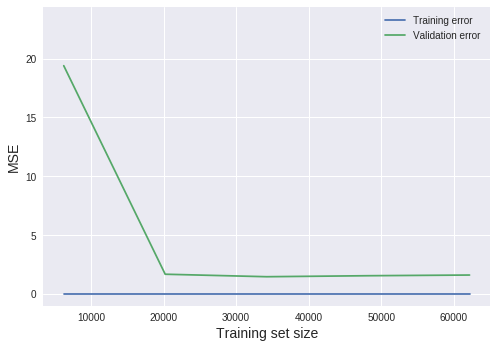

In [214]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(train_scores_mean.min()-1,validation_scores_mean.max()+5)
plt.show()

# Neural Network

In [182]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [183]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

In [184]:
# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.compile(optimizer='adam', loss='mse',metrics=['mse','accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [185]:
train_model_NN = NN_model.fit(train_input, train_output, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.2,shuffle=True,
                            callbacks=[LearningRateScheduler(lr_schedule)])

Train on 55282 samples, validate on 13821 samples
Epoch 1/30
55282/55282 [==============================] - 7s 129us/step - loss: 57.1562 - mean_squared_error: 57.1562 - acc: 1.8089e-05 - val_loss: 0.4378 - val_mean_squared_error: 0.4378 - val_acc: 0.0000e+00
Epoch 2/30
55282/55282 [==============================] - 7s 126us/step - loss: 3.1915 - mean_squared_error: 3.1915 - acc: 0.0000e+00 - val_loss: 0.3554 - val_mean_squared_error: 0.3554 - val_acc: 0.0000e+00
Epoch 3/30
55282/55282 [==============================] - 7s 128us/step - loss: 2.7586 - mean_squared_error: 2.7586 - acc: 0.0000e+00 - val_loss: 2.4584 - val_mean_squared_error: 2.4584 - val_acc: 0.0000e+00
Epoch 4/30
55282/55282 [==============================] - 7s 124us/step - loss: 3.3951 - mean_squared_error: 3.3951 - acc: 0.0000e+00 - val_loss: 11.4175 - val_mean_squared_error: 11.4175 - val_acc: 0.0000e+00
Epoch 5/30
55282/55282 [==============================] - 7s 124us/step - loss: 2.2503 - mean_squared_error: 2.250

In [193]:
print(train_model_NN.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_acc', 'loss', 'mean_squared_error', 'acc'])


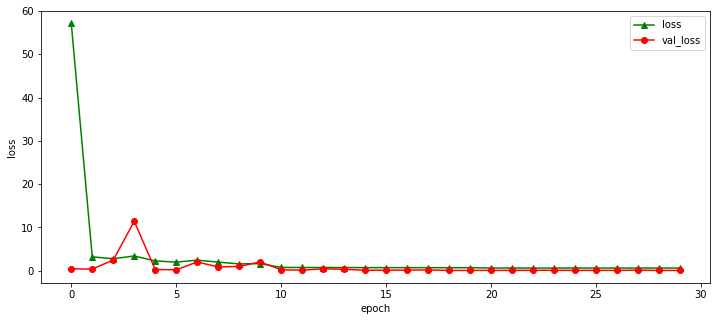

In [194]:
# summarize history for accuracy
plt.plot(train_model_NN.history['loss'],'-^', color = 'green')
plt.plot(train_model_NN.history['val_loss'],'-o', color = 'red')

# plt.plot(train_model_NN.history['mean_squared_error'],'-^', color = 'green')
# plt.plot(train_model_NN.history['val_mean_squared_error'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
plt.savefig('Neural_Network_loss_vs_epoch_shuffle_false.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [195]:
predicted_output_NN = NN_model.predict(test_input)

In [196]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_NN))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_NN))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_NN))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_NN))
print('RMSE: ',RMSE)

r_2 statistic: 1.00
Mean_absolute_error: 0.11
Mean squared error: 0.02
RMSE:  0.1264640993724867


In [190]:
test_output_NN = np.reshape(test_output,(-1,1))
test_output_NN.shape

(200, 1)

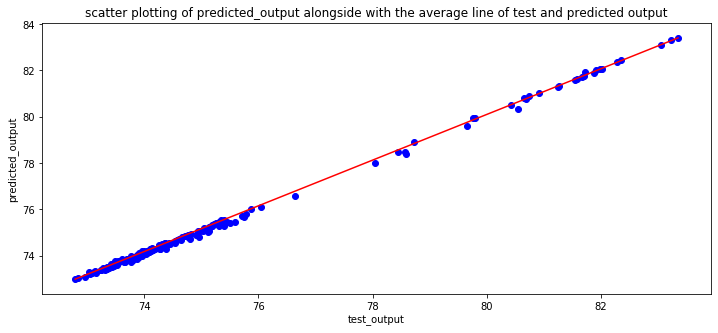

<class 'numpy.ndarray'>


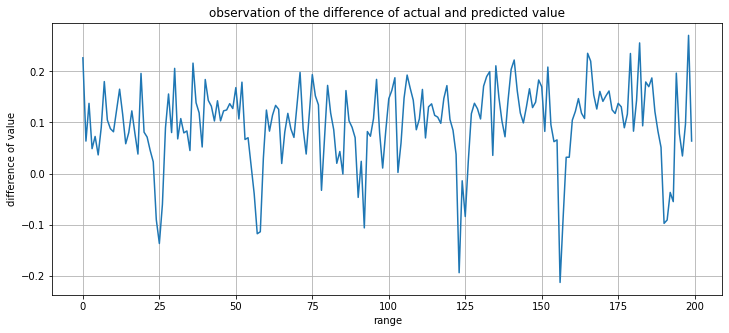

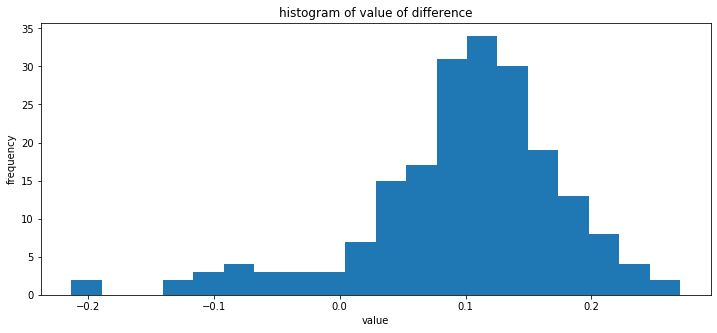

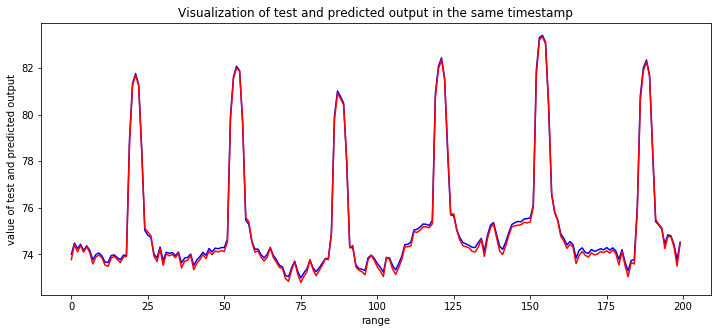

In [191]:
plot_graph(test_output_NN, predicted_output_NN, final_directory,'Neural_Network')

In [192]:
evaluation_metrices(test_output_NN,predicted_output_NN,final_directory,'Neural Netowrk', evaluation_metrics_file_path)

r_2 statistic: 1.00
Mean_absolute_error: 0.11
Mean squared error: 0.02
RMSE:  0.1264640993724867
!!!!---------------!!!!----------------!!!!


# LSTM

In [113]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [114]:
multiple_ip_train_data, multiple_ip_test_set = make_dataset_LSTM(dataframe_interpolate, required_number_of_test_data)

go_for_training:  69103
required_number_of_test_data:  200
percentage:  0.9971141220437788
dataset length:  69303
Number of Elements for training:  69103
LSTM train set:  (69103, 4)
LSTM test set:  (200, 4)


In [115]:
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, number_of_step_lstm)

In [116]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

X_Conv_Lstm shape:  (69101, 2, 3) 	X_Conv_Lstm size:  414606 	X_Conv_Lstm dimension:  3
y_Conv_Lstm shape:  (69101,)  size:  69101  dim:  1


In [117]:
samples = X_Conv_Lstm.shape[0]
time = number_of_step_lstm
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

In [118]:
# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [119]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

X_Conv_Lstm shape:  (69101, 2, 3) 	X_Conv_Lstm size:  414606 	X_Conv_Lstm dimension:  3
X_Conv_Lstm_train shape:  (69101, 2, 1, 3, 1) 	X_Conv_Lstm_train size:  414606 	X_Conv_Lstm_train dimension:  5


In [136]:
lr = 0.01

def lr_schedule(epoch):
    print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
    print('now lr_1: ', lr_1)
    return lr_1

batch_size = batch_size
activation_function = 'relu'

In [137]:
model = LSTM_model(activation_function, time, rows, cols, channels)

In [138]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_3 (ConvLSTM2D)  (None, 1, 2, 64)          33536     
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


In [143]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2, 
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

Train on 55280 samples, validate on 13821 samples
epoch value:  0
now lr_1:  0.01
Epoch 1/30
55280/55280 [==============================] - 7s 135us/step - loss: 2.3401 - acc: 0.0000e+00 - val_loss: 0.9694 - val_acc: 0.0000e+00
epoch value:  1
now lr_1:  0.01
Epoch 2/30
55280/55280 [==============================] - 7s 135us/step - loss: 1.8901 - acc: 0.0000e+00 - val_loss: 3.0594 - val_acc: 0.0000e+00
epoch value:  2
now lr_1:  0.01
Epoch 3/30
55280/55280 [==============================] - 7s 134us/step - loss: 1.8257 - acc: 0.0000e+00 - val_loss: 1.3973 - val_acc: 0.0000e+00
epoch value:  3
now lr_1:  0.01
Epoch 4/30
55280/55280 [==============================] - 7s 131us/step - loss: 1.8760 - acc: 1.8090e-05 - val_loss: 0.8422 - val_acc: 0.0000e+00
epoch value:  4
now lr_1:  0.01
Epoch 5/30
55280/55280 [==============================] - 7s 134us/step - loss: 1.8688 - acc: 0.0000e+00 - val_loss: 0.8970 - val_acc: 0.0000e+00
epoch value:  5
now lr_1:  0.01
Epoch 6/30
55280/55280 [====

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


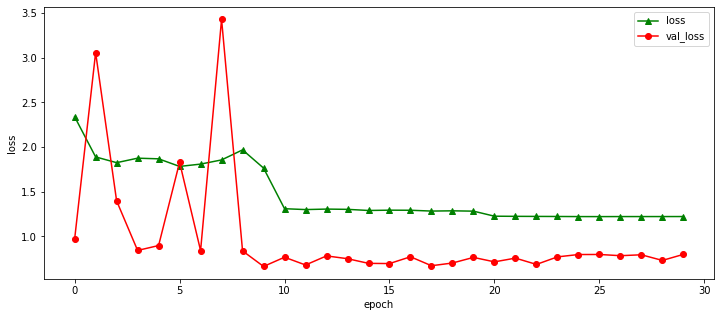

In [144]:
print(train_model.history.keys())

# summarize history for accuracy
# plt.plot(train_model_vanilla.history['acc'], '-o', color = 'red')
plt.plot(train_model.history['loss'],'-^', color = 'green')
plt.plot(train_model.history['val_loss'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
# plt.savefig('vanilla_lstm_loss_vs_epoch_shuffle_false.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [145]:
# model.save_weights("CONV_LSTM_model.h5")
model.save("CONV_LSTM_model.h5")

In [146]:
from keras.models import load_model
load_trained_CONV_LSTM=load_model("CONV_LSTM_model.h5")
# load_trained_model=load_model("/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/CONV_LSTM_model.h5")

In [147]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, number_of_step_lstm)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)
print('y_Conv_Lstm_test shape: ', y_Conv_Lstm_test.shape,'\t y_Conv_Lstm_test dimension: ', y_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

X_Conv_Lstm_test shape:  (198, 2, 3) 	 X_Conv_Lstm_test dimension:  3
y_Conv_Lstm_test shape:  (198,) 	 y_Conv_Lstm_test dimension:  1


In [148]:
yhat = model.predict(x_input, verbose=1)

198/198 [==============================] - 0s 978us/step


In [149]:
yhat_loaded = load_trained_CONV_LSTM.predict(x_input, verbose=1)

198/198 [==============================] - 0s 998us/step


In [150]:
y_Conv_Lstm_test_reshape = np.reshape(y_Conv_Lstm_test,(-1,1))
y_Conv_Lstm_test_reshape.shape

(198, 1)

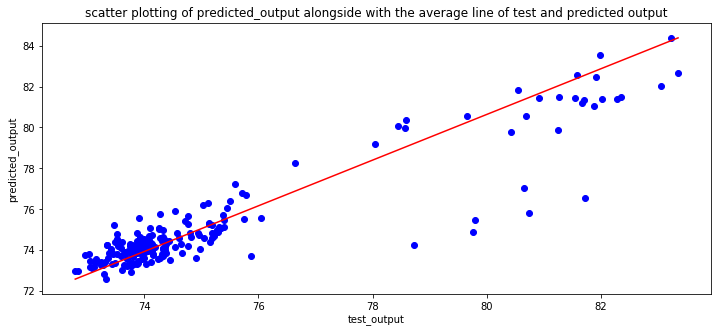

<class 'numpy.ndarray'>


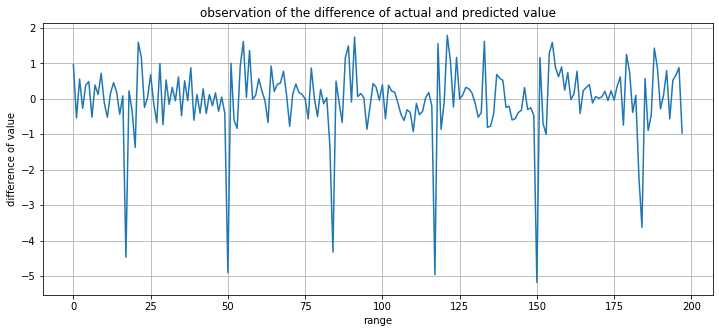

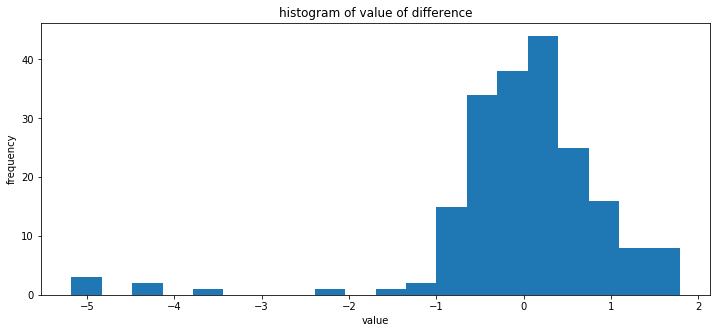

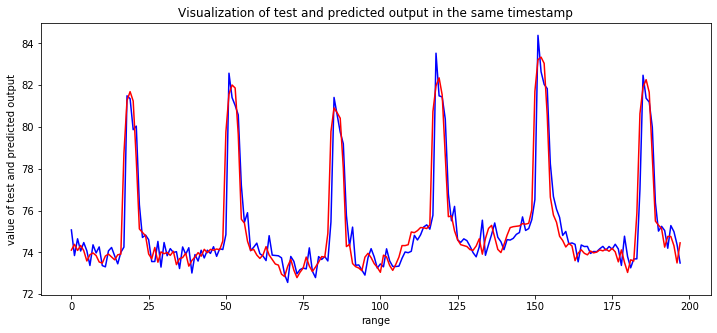

In [151]:
plot_graph(y_Conv_Lstm_test_reshape, yhat, final_directory,'CONV_LSTM')

In [152]:
evaluation_metrices(y_Conv_Lstm_test_reshape, yhat_loaded, final_directory, 'CONV_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.84
Mean_absolute_error: 0.63
Mean squared error: 1.07
RMSE:  1.0325203175434488
!!!!---------------!!!!----------------!!!!


In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)

# VANILLA LSTM

In [153]:
X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data, number_of_step_lstm)
# X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data,5)

In [154]:
print('X_train_vanilla shape: ',X_train_vanilla.shape,'\t dimension: ',X_train_vanilla.ndim,'\t size: ',X_train_vanilla.size)
print('y_train_vanilla shape: ',y_train_vanilla.shape,'\t dimension: ',y_train_vanilla.ndim,'\t size: ',y_train_vanilla.size)

X_train_vanilla shape:  (69101, 2, 3) 	 dimension:  3 	 size:  414606
y_train_vanilla shape:  (69101,) 	 dimension:  1 	 size:  69101


In [155]:
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], X_train_vanilla.shape[-1]))
print(X_train_vanilla.shape)

(69101, 2, 3)


In [156]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import Bidirectional
from keras import optimizers

In [157]:
def vanilla_lstm(n_steps_vanilla, n_features_vanilla):
    model = Sequential()
#     model.add(LSTM(units=100, activation='relu', batch_input_shape=(8,n_steps_vanilla,n_features_vanilla)))
    model.add(LSTM(units=100, activation='relu', input_shape=(n_steps_vanilla, n_features_vanilla),return_sequences=False)) # make False if use only 1 layer.
                                                                                                                                                                #make True if need multi layer
#     model.add(LSTM(100,return_sequences=True))
#     model.add(LSTM(100))
#     model.add(Dropout(0.5))
    model.add(Dense(1))
    return model

In [163]:
n_steps_vanilla = number_of_step_lstm
# n_steps_vanilla = 5
n_features_vanilla = X_train_vanilla.shape[-1]
vanilla_model = vanilla_lstm(n_steps_vanilla, n_features_vanilla)

In [164]:
vanilla_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [165]:
vanilla_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               41600     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [166]:
# epochs = 30

In [167]:
train_model_vanilla = vanilla_model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.2,
                                        shuffle=True,callbacks=[LearningRateScheduler(lr_schedule)])

Train on 55280 samples, validate on 13821 samples
epoch value:  0
now lr_1:  0.01
Epoch 1/30
55280/55280 [==============================] - 7s 125us/step - loss: 23.6576 - acc: 1.8090e-05 - val_loss: 2.8471 - val_acc: 0.0000e+00
epoch value:  1
now lr_1:  0.01
Epoch 2/30
55280/55280 [==============================] - 7s 120us/step - loss: 4.8116 - acc: 1.8090e-05 - val_loss: 2.2361 - val_acc: 0.0000e+00
epoch value:  2
now lr_1:  0.01
Epoch 3/30
55280/55280 [==============================] - 7s 119us/step - loss: 4.0387 - acc: 1.8090e-05 - val_loss: 1.7461 - val_acc: 0.0000e+00
epoch value:  3
now lr_1:  0.01
Epoch 4/30
55280/55280 [==============================] - 7s 119us/step - loss: 2.9587 - acc: 0.0000e+00 - val_loss: 3.9942 - val_acc: 0.0000e+00
epoch value:  4
now lr_1:  0.01
Epoch 5/30
55280/55280 [==============================] - 7s 120us/step - loss: 2.4049 - acc: 1.8090e-05 - val_loss: 0.8943 - val_acc: 0.0000e+00
epoch value:  5
now lr_1:  0.01
Epoch 6/30
55280/55280 [===

In [168]:
print(train_model_vanilla.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


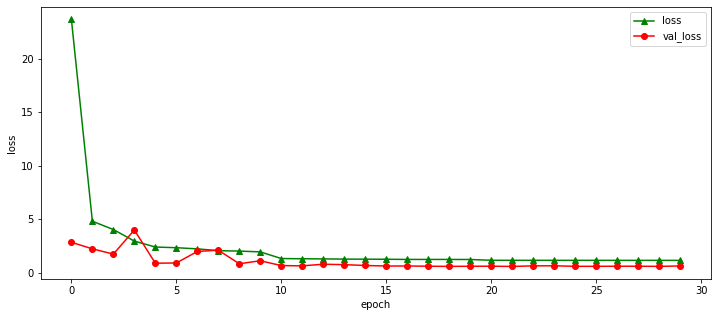

In [170]:
# summarize history for accuracy
# plt.plot(train_model_vanilla.history['acc'], '-o', color = 'red')
plt.plot(train_model_vanilla.history['loss'],'-^', color = 'green')
plt.plot(train_model_vanilla.history['val_loss'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
# plt.savefig('vanilla_lstm_loss_vs_epoch_shuffle_false.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [171]:
vanilla_model.save("VANILLA_LSTM.h5")

In [172]:
from keras.models import load_model
load_trained_VANILLA_LSTM=load_model("VANILLA_LSTM.h5")

In [175]:
test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,number_of_step_lstm)
# test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,1)
n_features_test = test_ip_vanilla.shape[-1]
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features_test))

In [176]:
yhat_vanilla_loaded = vanilla_model.predict(X_test_ip_vanilla, verbose=1)
print(yhat_vanilla_loaded.shape)

198/198 [==============================] - 0s 1ms/step
(198, 1)


In [177]:
# evaluate the model
_, train_mse = vanilla_model.evaluate(X_train_vanilla, y_train_vanilla, verbose=0)
_, test_mse = vanilla_model.evaluate(X_test_ip_vanilla, test_op_vanilla, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.000


In [178]:
evaluation_metrices(test_op_vanilla, yhat_vanilla_loaded, final_directory, 'VANILLA_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.84
Mean_absolute_error: 0.62
Mean squared error: 1.05
RMSE:  1.023637838884722
!!!!---------------!!!!----------------!!!!


In [179]:
test_op_vanilla_reshape = np.reshape(test_op_vanilla,(-1,1))
print(test_op_vanilla_reshape.shape)
print(yhat_vanilla_loaded.shape)

(198, 1)
(198, 1)


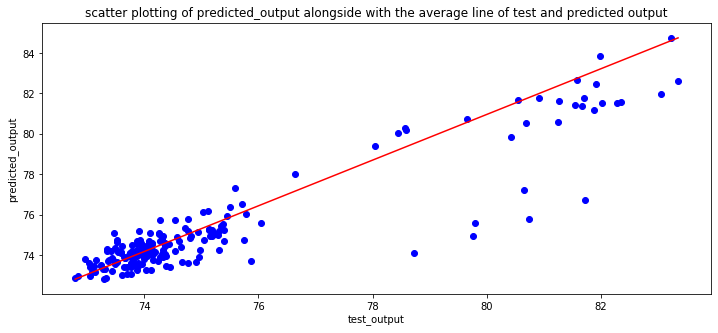

<class 'numpy.ndarray'>


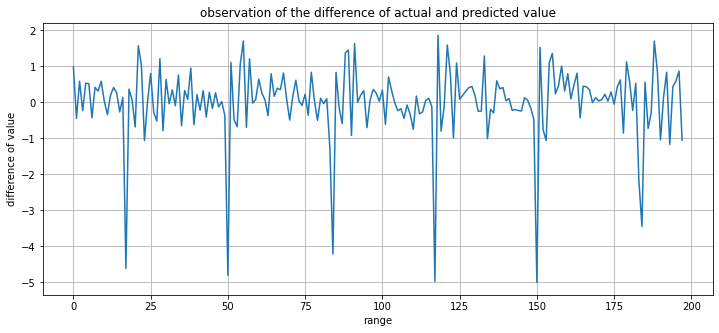

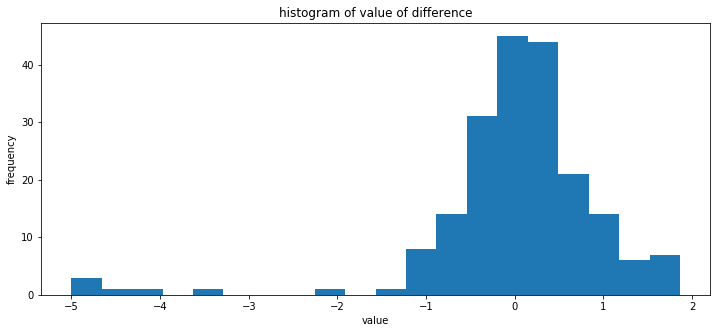

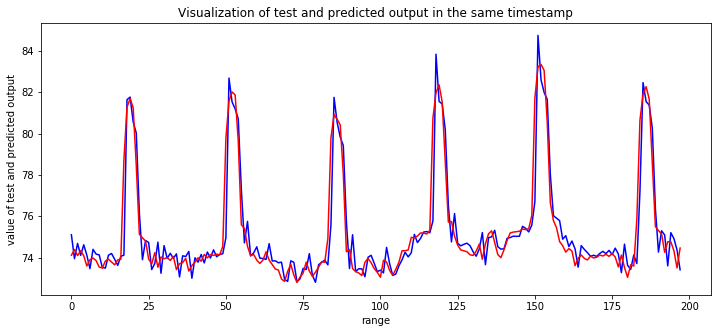

In [180]:
plot_graph(test_op_vanilla_reshape, yhat_vanilla_loaded, final_directory,'vanilla_LSTM')

In [ ]:
import numpy as np
A = [12,3,4,5,6,7,8,9,12,10,201,202,21,-2,-3]

In [ ]:
A = np.array(A)
print(type(A))
print(A.shape)

In [ ]:
print(A[0:])

In [ ]:
print(A[-1:])

In [ ]:
print(A[-5:])

# ARIMA TESTING

In [ ]:
df = dataframe_no_string[[target_column]]

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
df_1 = dataframe_no_string.iloc[:,-1]
type(df_1)

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# from numpy import log
# result = adfuller(df_1.values.dropna())
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

In [ ]:
print(df.shape)
print(df_1.shape)

In [ ]:
# ADF Test
result = adfuller(df_1.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    p_value = dfoutput['p-value']
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 
    
    if p_value <= 0.05:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
    

In [ ]:
test_stationarity(df_1)

In [ ]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9985)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(df)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

In [ ]:
Actual = [x for x in train_set]
Predictions = list()

In [ ]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
#     print('from function screaming')
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [ ]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,1,2)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

In [ ]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions))
print("size of actual: ",len(Actual))

In [ ]:
print(type(Predictions))
predictions_array = np.array(Predictions)
print(type(predictions_array))
print(predictions_array.shape)
print(type(test_set))
print(test_set.shape)

In [ ]:
plt.subplot(2,2,1)
plt.plot(Predictions,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)

plt.subplot(2,2,2)
plt.plot((min(test_set), max(test_set)), (min(predictions_array), max(predictions_array)), color='red')
plt.scatter(test_set, predictions_array, color='blue')


plt.subplot(2,2,3)
difference_of_value = predictions_array - test_set
# print(type(difference_of_value))
plt.plot(difference_of_value[:])

plt.subplot(2,2,4)
plt.hist(difference_of_value, bins=20)

plt.show()

In [ ]:
%matplotlib inline
import re
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.pairplot(dataframe_high_correlation, height = 2.5)

In [ ]:
stat, p = stats.normaltest(df_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

In [ ]:
# decomposition = seasonal_decompose(df.iloc[:,-1], freq=7)
decomposition = seasonal_decompose(df_1, freq=7)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12,5)

In [ ]:
n_sample = df_1.shape[0]
print(n_sample)

In [ ]:
n_train=int(0.9985*n_sample)+1
n_forecast=n_sample-n_train

ts_train = df.iloc[:n_train][target_column]
ts_test = df.iloc[n_train:][target_column]
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.head(), "\n")
print("Testing Series:", "\n", ts_test.head())

In [ ]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [ ]:
tsplot(ts_train, title='Output of the Turbine 9', lags=7)

In [ ]:
print(dataframe_high_correlation.shape)

In [ ]:
dataframe_resample = dataframe_high_correlation.resample('1min').mean()

In [ ]:
print(dataframe_resample.shape)

In [ ]:
print(dataframe_resample.shape)

plt.plot(dataframe_resample[target_column], color = 'blue')
# plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# plt.xticks(rotation = 'vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column.png',bbox_inches='tight')
plt.xlim(dataframe_resample.index[0],dataframe_resample.index[-1]+5)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
dataframe_resample.index[-1]